In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  6 18:35:20 2018
Supervised text based heirarchical classification for dresses styles using product description
@author: Arjun ; Project: Shopin
"""
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import average_precision_score
%matplotlib inline

In [3]:
dress_data=pd.read_csv('Dress.csv')
#### Keep only useful columns which is style and column name  ####
#dress_data=dress_data[['style','details']]
dress_data=dress_data[['style','details','product_mini_des']]
#style_to_keep=['a-line','evening gown','sheath','shift','off-the-shoulder',	'fit and flare','column gown','bodycon','jumpsuits','ball gown']
#style_to_keep=['a-line','evening gown','sheath']
style_to_keep=['off-the-shoulder','fit and flare','column gown','bodycon','jumpsuits','ball gown']
dress_data=dress_data[ dress_data['style'].isin(style_to_keep)]

In [4]:
dress_data['style'].unique()

array(['column gown', 'fit and flare', 'jumpsuits', 'ball gown',
       'bodycon', 'off-the-shoulder'], dtype=object)

In [6]:
stop=list(stopwords.words('english'))

def REMOVE_NON_ALPHA(Input_product_detail):
    clean_part1=re.sub('[^a-zA-Z]+', ' ', Input_product_detail)
    return clean_part1
dress_data['clean1']=dress_data.details.apply(REMOVE_NON_ALPHA)    

def RM_STOPWORDS(dataframe,column_of_operation):
    for row_num,text in enumerate(dataframe[column_of_operation]):
        word_token = word_tokenize(text)
        temp_text = []
        for word_tag in word_token:
            if word_tag  not in stop:
                temp_text.append(word_tag.lower())
                sent_mod = " ".join(temp_text)     
    
        dataframe.loc[row_num,"RMV_STP"] = sent_mod
       
    return dataframe['RMV_STP']

#RM_STOPWORDS(dataframe=dress_data,column_of_operation='clean1')
#dress_data.dropna(axis=0,inplace=True)

In [7]:
dress_data['style'].unique()
X_train,X_test,y_train,y_test=train_test_split(dress_data['clean1'],dress_data['style'],test_size=0.2) 

In [20]:
       
""" Use SVM for classification and 5k iterations """
"""
Use Linear Kernel and a l1 regularisation 
Keep top 100 features and use max 5k iters
"""
pipeline=Pipeline([('vect',CountVectorizer(ngram_range=[1,1],stop_words='english')),
                  ('chi',SelectKBest(chi2,k=100)),
                  ('clf',LinearSVC(C=1.0,penalty='l1',dual=False))])
    

model=pipeline.fit(X_train,y_train)

vectorizer=model.named_steps['vect']
chi=model.named_steps['chi']
clf=model.named_steps['clf']
feature_names=vectorizer.get_feature_names()
feature_names=[feature_names[i] for i in chi.get_support(indices=True) ]
feature_names=np.asarray(feature_names)

print("Test accuracy score : " + str(model.score(X_test,y_test)))
print("Train accuracy score : " + str(model.score(X_train,y_train)))


Test accuracy score : 0.7251585623678647
Train accuracy score : 0.7656084656084656


In [21]:
pred = model.predict(X_test)
cm=confusion_matrix(y_test.values,pred)
cm

array([[18,  0, 20,  5,  0,  3],
       [ 0, 45,  1, 20,  0, 10],
       [ 6,  4, 71,  4,  0,  6],
       [ 2, 13,  4, 73,  0,  7],
       [ 0,  0,  0,  3, 59,  0],
       [ 2,  5,  6,  9,  0, 77]], dtype=int64)

In [8]:
print(pred[1],y_test.values[1],X_test.values[1])

a-line a-line Roundneck Cap sleeves Pullover style About from shoulder to hem Silk elastane Dry clean Made in USA Model shown is cm wearing US size Small 


In [9]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# A line, sheath and evening gown

Confusion matrix, without normalization


0.7338501291989664

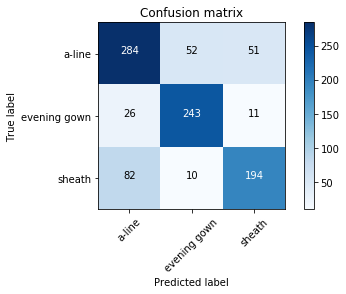

In [12]:
# 3 
plot_confusion_matrix(cm,style_to_keep)
284/(284+52+51)

# Off shoulder to ball gown

Confusion matrix, without normalization


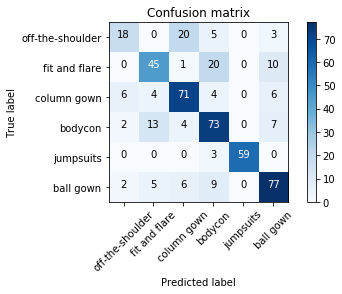

In [23]:
# 3 
plot_confusion_matrix(cm,style_to_keep)